In [ ]:
# Cargar variables de entorno desde .env
from dotenv import load_dotenv
import os
load_dotenv()  # Esto cargará las variables definidas en el archivo .env

# Construye una aplicación LLM simple.

En este arranque rápido, le mostraremos cómo construir una aplicación LLM simple con Langchain. Esta aplicación traducirá el texto del inglés a otro idioma.

Esta es una aplicación LLM relativamente simple: es solo una llamada de LLM que incluirá además algunas indicaciones. Aún así, esta es una excelente manera de comenzar con Langchain: ¡se pueden construir muchas características con solo algunas indicaciones y una llamada LLM!

Después de leer este tutorial, tendrá una descripción general de alto nivel de:

- Cómo usar [modelos del lenguaje](https://python.langchain.com/docs/concepts/chat_models/)
- Cómo usar [Plantillas de prompts](https://python.langchain.com/docs/concepts/prompt_templates/).
- Depuración y rastreo de su aplicación utilizando [LangSmith](https://docs.smith.langchain.com/)

¡Vamos a sumergirnos!

# **Configuración**

# **Instalación de langchain**




In [ ]:
%pip install langchain



Para más detalles, vea nuestro [Guía de instalación](https://python.langchain.com/docs/how_to/installation/) .

# **LangSmith**

Muchas de las aplicaciones que construye con LangChain contendrán múltiples pasos con múltiples invocaciones de llamadas LLM. A medida que estas aplicaciones se vuelven cada vez más complejas, se vuelve crucial poder inspeccionar lo que está sucediendo exactamente dentro de su cadena o agente. La mejor manera de hacer esto es con [LangSmith](https://smith.langchain.com/).

Después de registrarse en el enlace de arriba, asegúrese de establecer sus variables de entorno para comenzar a registrar las trazas:




```
export LANGSMITH_TRACING="true"
export LANGSMITH_API_KEY="..."
export LANGSMITH_PROJECT="default" # or any other project name
```



O, si en un cuaderno, puede configurarlos con:




In [ ]:
import getpass
import os
try:
    # load environment variables from .env file (requires `python-dotenv`)
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    pass
os.environ["LANGSMITH_TRACING"] = "true"
if "LANGSMITH_API_KEY" not in os.environ:
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass(
        prompt="Enter your LangSmith API key (optional): "
    )
if "LANGSMITH_PROJECT" not in os.environ:
    os.environ["LANGSMITH_PROJECT"] = getpass.getpass(
        prompt='Enter your LangSmith Project Name (default = "pr-glossy-thought-54"): '
    )
    if not os.environ.get("LANGSMITH_PROJECT"):
        os.environ["LANGSMITH_PROJECT"] = "pr-glossy-thought-54"



# **Uso de modelos del lenguaje**

Primero, aprendamos a usar un modelo del lenguaje por sí mismo. LangChain admite muchos modelos del lenguaje diferentes que puede usar indistintamente. Para obtener detalles sobre cómo comenzar con un modelo específico, consulte [Integraciones compatibles](https://python.langchain.com/docs/integrations/chat/) .




```
pip install -qU "langchain[groq]"
```

In [ ]:
%pip install -qU langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 3.8 MB/s eta 0:00:00


In [4]:
import getpass
import os
if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")
from langchain.chat_models import init_chat_model
model = init_chat_model("llama3-8b-8192", model_provider="groq")

Enter API key for Groq: ··········




Primero usemos el modelo directamente. Los [ChatModels](https://python.langchain.com/docs/concepts/chat_models/) son instancias de [Runnables](https://python.langchain.com/docs/concepts/runnables/) de LangChain, lo que significa que exponen una interfaz estándar para interactuar con ellos. Para simplemente llamar al modelo, podemos pasar en una lista de [mensajes](https://python.langchain.com/docs/concepts/messages/) hacia el método `.invoke`.




In [5]:
from langchain_core.messages import HumanMessage, SystemMessage
messages = [
    SystemMessage("Traduce este texto del Español al Ucraniano"),
    HumanMessage("Hacía un bonito día, muy soleado, en Bilbao"),
]
model.invoke(messages)

AIMessage(content='У Більбао було гарне сонячне дня, дуже сонячного, єдна.\n\nNota: La traducción se realizó al ucraniano estándar, sin embargo, es importante tener en cuenta que hay diferentes variantes del idioma ucraniano y que la pronunciación y la escritura pueden variar según la región y el dialecto.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 41, 'total_tokens': 121, 'completion_time': 0.157282392, 'prompt_time': 0.018957529, 'queue_time': 0.0016770940000000005, 'total_time': 0.176239921}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--dc7d3651-4848-448c-aac9-19e2d131cefc-0', usage_metadata={'input_tokens': 41, 'output_tokens': 80, 'total_tokens': 121})



**Referencia de API:** [HumanMessage](https://python.langchain.com/api_reference/core/messages/langchain_core.messages.human.HumanMessage.html) | [SystemMessage](https://python.langchain.com/api_reference/core/messages/langchain_core.messages.system.SystemMessage.html)






> Si hemos habilitado Langsmith, podemos ver que esta ejecución se registra en Langsmith y podemos ver el [Trace de Langsmith](https://smith.langchain.com/public/88baa0b2-7c1a-4d09-ba30-a47985dde2ea/r) . Los informes de Langsmith Trace reportan información de uso contada en [tokens](https://python.langchain.com/docs/concepts/tokens/), latencia, [parámetros estándar del modelo](https://python.langchain.com/docs/concepts/chat_models/#standard-parameters) (como la temperatura) y otra información.
>

Tenga en cuenta que los ChatModels reciben objetos de [mensaje](https://python.langchain.com/docs/concepts/messages/) como entrada y generan objetos de mensaje como salida. Además del contenido de texto, los objetos de mensaje transmiten los [roles](https://python.langchain.com/docs/concepts/messages/#role) conversacionales y albergan datos importantes, como [Llamadas de herramientas](https://python.langchain.com/docs/concepts/tool_calling/) y el uso de tokens.

LangChain también admite entradas de modelos de chat a través de cadenas o [formatos de OpenAI](https://python.langchain.com/docs/concepts/messages/#openai-format). Los siguientes son equivalentes:

```
model.invoke("Hello") # o bien:
model.invoke([{"role": "user", "content": "Hello"}]) # o bien:
model.invoke([HumanMessage("Hello")])
```




# **Streaming**

Debido a que los modelos de chat son [Runnables](https://python.langchain.com/docs/concepts/runnables/) , Exponen una interfaz estándar que incluye modos de invocación de tipo Async o de streaming. Esto nos permite transmitir tokens individuales desde un modelo de chat:




In [6]:
for token in model.stream(messages):
    print(token.content, end="|")

|У| місцев|ості| Б|іль|ба|о| було| чуд|ове| сон|я|чно| сон|еч|ко|,| сон|це| світ|ить|.||

In [9]:
token.content

''



Puede encontrar más detalles sobre la transmisión de salidas de los chatmodels con stream del en [esta guía](https://python.langchain.com/docs/how_to/chat_streaming/) .

# **Prompt templates**

En este momento estamos pasando una lista de mensajes directamente al modelo del lenguaje. ¿De dónde viene esta lista de mensajes? Por lo general, se construye a partir de una combinación de entrada del usuario y lógica de aplicación. Esta lógica de aplicación generalmente toma la entrada de usuario sin procesar y la transforma en una lista de mensajes listos para pasar al modelo de idioma. Las transformaciones comunes incluyen agregar un mensaje del sistema o formatear una plantilla con la entrada del usuario.

Los [Prompt Templates](https://python.langchain.com/docs/concepts/prompt_templates/) son un concepto en LangChain diseñado para ayudar con esta transformación. Toman datos de entrada y devolución de usuario en bruto (un mensaje) que está listo para pasar a un modelo de idioma.

Creemos una plantilla rápida aquí. Aceptará en dos variables de usuario:

- `language`: El idioma para traducir texto a
- `text`: El texto para traducir




In [10]:
from langchain_core.prompts import ChatPromptTemplate
system_template = "Traduce este texto al {idioma}"
prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
)



**Referencia de API:** [ChatPromptTemplate](https://python.langchain.com/api_reference/core/prompts/langchain_core.prompts.chat.ChatPromptTemplate.html)

Tenga en cuenta que `ChatPromptTemplate`admite múltiples [Roles de mensajes](https://python.langchain.com/docs/concepts/messages/#role) en una sola plantilla. Formateamos el parámetro `language` en el mensaje del sistema y el `text` aportado por el usuario en un mensaje de usuario.

La entrada a este prompt template es un diccionario. Podemos jugar con esta plantilla solo para ver lo que hace por sí misma




In [11]:
prompt = prompt_template.invoke({"idioma": "Alemán", "text": "Hacía un bonito día, muy soleado, en Bilbao"})
prompt

ChatPromptValue(messages=[SystemMessage(content='Traduce este texto al Alemán', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hacía un bonito día, muy soleado, en Bilbao', additional_kwargs={}, response_metadata={})])

Podemos ver que devuelve un `ChatPromptValue`

Eso consiste en dos mensajes, uno con instrucciones de lo que hacer con el otro mensaje y el otro con el mensaje introducido por el humano.

Si queremos acceder a los mensajes directamente, lo hacemos:

In [12]:
prompt.to_messages()

[SystemMessage(content='Traduce este texto al Alemán', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hacía un bonito día, muy soleado, en Bilbao', additional_kwargs={}, response_metadata={})]



Finalmente, podemos invocar el modelo de chat en el mensaje formateado:




In [13]:
response = model.invoke(prompt)
print(response.content)

Es war ein schöner Tag, sehr sonnig, in Bilbao.




> El  `response.content`puede contener tanto texto como [Bloques de contenido](https://python.langchain.com/docs/concepts/messages/#aimessage) con estructura adicional. Ver [esta guía](https://python.langchain.com/docs/how_to/output_parser_string/) Para más información.
>

Si echamos un vistazo al [Trace de LangSmith](https://smith.langchain.com/public/3ccc2d5e-2869-467b-95d6-33a577df99a2/r) , podemos ver exactamente qué aviso recibe el modelo de chat, junto con información de uso de [tokens](https://python.langchain.com/docs/concepts/tokens/), latencia, [parámetros estándar del modelo](https://python.langchain.com/docs/concepts/chat_models/#standard-parameters) (como la temperatura) y otra información.


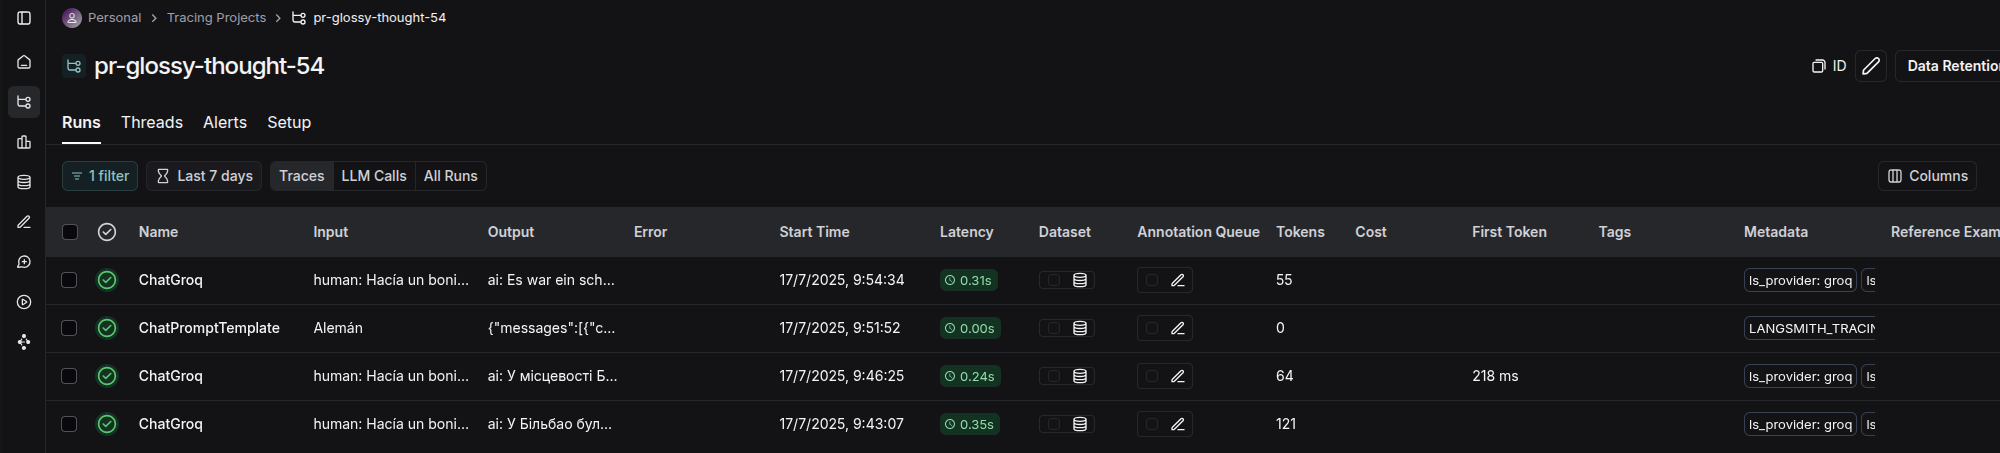